In [2]:
import pandas as pd
import numpy as np

In [3]:
model=pd.read_csv("ratings_Electronics.csv")

In [4]:
model.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
# userId, productId, and ratings

model['userId']=model.iloc[:,0]
model.drop(columns='AKM1MP6P0OYPR', inplace = True)
model['userId'][0]='AKM1MP6P0OYPR'

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
model['productId']=model.iloc[:,0]
model.drop(columns='0132793040', inplace = True)
model['productId'][0]='0132793040'

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
model['rating']=model.iloc[:,0]
model.drop(columns='5.0', inplace = True)
model['rating'][0]='5.0'

/Users/nikhilkanojia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
model.drop(columns='1365811200', inplace = True)

In [9]:
model

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0
...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824477,A322MDK0M89RHN,BT008UKTMW,5.0
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [10]:
model.shape

(7824481, 3)

In [11]:
#taking 10% of the data

model=model.iloc[0:782448,:]

In [12]:
model.shape

(782448, 3)

In [15]:
model.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


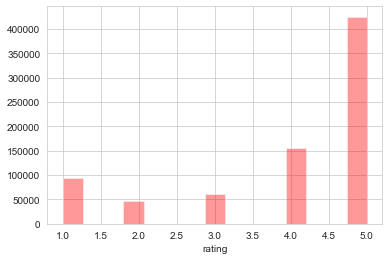

In [16]:
#5 is the highest rated given by max number of user
#ratings with a step of (0,5) is not provided by any of the users
import seaborn as sns
sns.set_style('whitegrid') 
sns.distplot(model['rating'], kde = False, color ='red', bins = 15) 

In [17]:
model.describe()

,rating
count,782448.000000
mean,3.981954
std,1.396133
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
ratings_mean_count = pd.DataFrame(model.groupby('userId')['rating'].mean())

In [19]:
ratings_mean_count['rating_counts'] = pd.DataFrame(model.groupby('userId')['rating'].count())

In [20]:
ratings_mean_count[ratings_mean_count.rating_counts > 50]

,rating,rating_counts
userId,,
A11D1KHM7DVOQK,3.169811,106
A12DLJESJKM1OQ,4.390625,64
A149RNR5RH19YY,3.815385,65
A1F9Z42CFF9IAY,3.602941,68
A1FR68QH6Z4YZM,4.671875,64
A1JWSDDIH5Z7DV,4.968750,64
A1MJMYLRTZ76ZX,4.544118,68
A1RPTVW5VEOSI,4.034483,58
A203OCQQ12MAVT,4.410959,73


In [21]:
test_df=ratings_mean_count[ratings_mean_count.rating_counts > 50]

In [22]:
test_df.shape

(25, 2)

In [23]:
#Popularity Based
#These products which are rated most will be recommended to the User

test_df.sort_values("rating_counts", axis = 0, ascending = False)[:10]
                 #inplace = True, na_position ='last')

,rating,rating_counts
userId,,
A5JLAU2ARJ0BO,3.843750,384
A231WM2Z2JL0U3,4.309237,249
A25HBO5V8S8SEA,4.963190,163
A6FIAB28IS79,4.106195,113
AT6CZDCP4TRGA,3.241071,112
AKT8TGIT6VVZ5,4.731481,108
A11D1KHM7DVOQK,3.169811,106
A2B7BUH8834Y6M,4.428571,98
A2AEZQ3DGBBLPR,4.024691,81


In [24]:
#Build Collab filtering
model.head()


,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [25]:

from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(model[['userId', 'productId', 'rating']], reader)

In [26]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.3)

In [27]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

In [28]:
predictions = algo.test(testset)

In [29]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.3075


1.3074523701487832

In [30]:
from surprise import KNNWithMeans
algo_knn = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo_knn.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [31]:
predictions=algo_knn.test(testset)

In [32]:
predictions[:5]

[Prediction(uid='A1VURM1RUDZCFF', iid='B00001W0EQ', r_ui=3.0, est=3.983142631268566, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1OLVFJYDDFKA3', iid='B0000XMUKK', r_ui=5.0, est=4.285714285714286, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A11KZ906QD08C5', iid='B0003V577C', r_ui=3.0, est=1.213601185077695, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3PDWG27X5CCEF', iid='B0002YE6EK', r_ui=5.0, est=3.983142631268566, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1EID2DBIURVUD', iid='B00005105L', r_ui=1.0, est=3.983142631268566, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})]

In [33]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.3902


1.390164054463681

In [ ]:
#INSIGHTS:
#The RMSE value was obtained as 1.3 via SVD method, while we got RMSE of 1.4 via KNN
#So SVD algorithm holds priority here.